<a href="https://colab.research.google.com/github/glaiml/prj10-cv-object-recognition/blob/master/VGK-FaceRecognition-Questions-Project-CV-AIMLOnline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [4]:
%cd "/content/drive/My Drive/ComputerVisionProjectData/ObjRecognition"

/content/drive/My Drive/ComputerVisionProjectData/ObjRecognition


In [5]:
!pwd

/content/drive/My Drive/ComputerVisionProjectData/ObjRecognition


### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('Aligned_Face_Dataset_from_Pinterest.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall()

In [8]:
!ls

Aligned_Face_Dataset_from_Pinterest.zip  pins  PINS  vgg_face_weights.h5


In [10]:
import os

os.listdir("PINS")

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    def to_dict(self):
        return {
            'base': self.base,
            'name': self.name,
            'file': self.file,
        }
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [13]:
print (metadata.shape)

(10770,)


In [14]:
print (metadata.size)

10770


In [15]:
print (metadata)

[PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
 PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
 PINS/pins_Aaron Paul/Aaron Paul101_248.jpg ...
 PINS/pins_zendaya/zendaya97.jpg PINS/pins_zendaya/zendaya98.jpg
 PINS/pins_zendaya/zendaya99.jpg]


In [16]:
print(metadata[0])

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

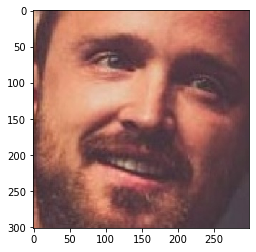

In [18]:
from matplotlib import pyplot
%matplotlib inline
image = load_image("PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")
pyplot.imshow(image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights("vgg_face_weights.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [23]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [24]:
def generate_embeddings():
  temp = []
  # Get embedding vector for first image in the metadata using the pre-trained model
  for i in metadata:
    try:
      img_path = i.image_path()
      img = load_image(img_path)

      # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32)

      img = cv2.resize(img, dsize = (224,224))

      # Obtain embedding vector for an image
      # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
      embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
      embedding_vector = (2622,)
      np.zeros(embedding_vector)
    temp.append(embedding_vector)
  return temp

embeddings = generate_embeddings()

AttributeError: ignored

In [27]:
print (embeddings[0])

[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
 -0.00908097]


In [28]:
print (embeddings[0].shape)

(2622,)


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

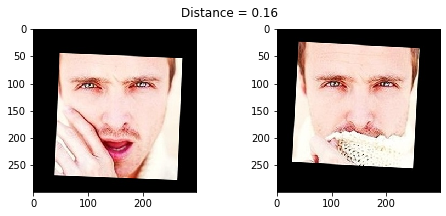

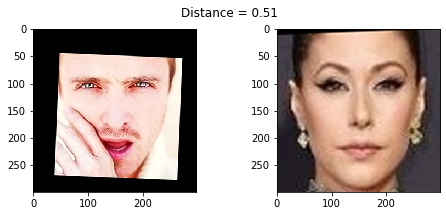

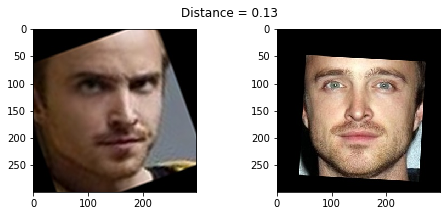

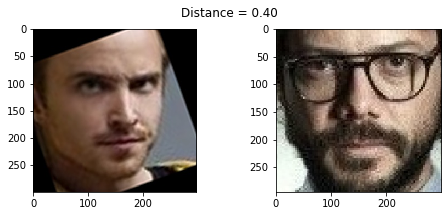

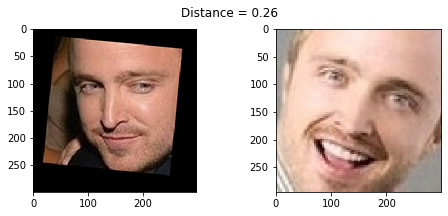

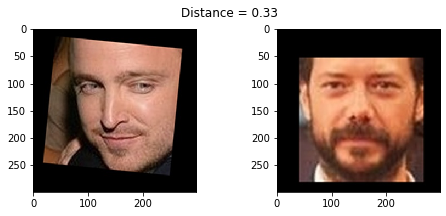

In [30]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [32]:
print(metadata[0].name)

pins_Aaron Paul


In [38]:
print(metadata[0].file)

Aaron Paul0_262.jpg


In [39]:
print(metadata[0].base)

PINS


In [41]:
print(metadata[0].image_path())

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


In [42]:
metadata.shape

(10770,)

In [45]:
np.shape(embeddings)

(10770, 2622)

In [50]:
#train_idx = np.arange(metadata.shape[0]) % 9 != 0
#test_idx = np.arange(metadata.shape[0]) % 9 == 0

##Split into training and test set
import pandas as pd

metadata_panda = pd.DataFrame.from_records([m.to_dict() for m in metadata])
metadata_panda.head(10)

,base,name,file
0,PINS,pins_Aaron Paul,Aaron Paul0_262.jpg
1,PINS,pins_Aaron Paul,Aaron Paul101_247.jpg
2,PINS,pins_Aaron Paul,Aaron Paul101_248.jpg
3,PINS,pins_Aaron Paul,Aaron Paul101_249.jpg
4,PINS,pins_Aaron Paul,Aaron Paul103_217.jpg
5,PINS,pins_Aaron Paul,Aaron Paul113_228.jpg
6,PINS,pins_Aaron Paul,Aaron Paul114_271.jpg
7,PINS,pins_Aaron Paul,Aaron Paul116_240.jpg
8,PINS,pins_Aaron Paul,Aaron Paul117_213.jpg
9,PINS,pins_Aaron Paul,Aaron Paul119_219.jpg


In [52]:
metadata_panda.shape

(10770, 3)

In [0]:
y_labels = metadata_panda.name
X = embeddings

In [0]:
# splitting will be done post encoding
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_labels)
list(lb.classes_) 


['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [60]:
y = lb.transform(y_labels)
print (y)

[ 0  0  0 ... 99 99 99]


In [61]:
y.shape

(10770,)

In [0]:
# splitting will be done post standardizing and PCA
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [64]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[ 0.01083115 -0.0003015   0.00288542 ... -0.01445758  0.00593633
  0.01350416]


In [0]:
X_Scale = scaler.transform(X)

In [82]:
X_Scale.shape

(10770, 2622)

In [87]:
feat_cols = ['feature'+str(i) for i in range(X_Scale.shape[1])]
X_Scale_PD = pd.DataFrame(X_Scale,columns=feat_cols)
X_Scale_PD.tail(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature2582,feature2583,feature2584,feature2585,feature2586,feature2587,feature2588,feature2589,feature2590,feature2591,feature2592,feature2593,feature2594,feature2595,feature2596,feature2597,feature2598,feature2599,feature2600,feature2601,feature2602,feature2603,feature2604,feature2605,feature2606,feature2607,feature2608,feature2609,feature2610,feature2611,feature2612,feature2613,feature2614,feature2615,feature2616,feature2617,feature2618,feature2619,feature2620,feature2621
10760,0.564643,0.799920,-0.357303,-0.355921,-0.018077,0.415710,-0.722159,-0.694454,-0.265138,-0.364559,0.169085,-0.374289,1.137577,1.153645,-1.281405,-0.288363,0.485312,0.274072,1.281326,1.528873,-0.041195,-1.169540,0.780207,-0.599557,-0.007589,-0.757712,-1.893533,-0.235656,2.243860,-1.337371,-0.629799,0.197112,0.872796,-1.105498,-0.328249,-0.253869,0.387896,1.227883,-2.010047,-0.506259,...,-0.489708,-0.035204,-1.311957,-0.659404,0.384344,-0.626697,1.053377,2.279507,-0.255007,-1.999442,2.699895,0.000979,0.668239,-0.249019,-1.252515,-0.360285,-0.987734,2.356581,0.062517,-1.483171,0.816234,-1.599319,-0.533712,-0.682433,-1.227580,-0.367680,-0.708927,-0.901990,-0.573886,-0.604118,-0.076836,0.294472,1.657403,0.506203,1.547800,1.620998,-0.317015,-0.611621,1.750652,0.873005
10761,0.540989,3.045853,0.537172,-1.554824,0.544360,-0.223585,0.514923,-0.061201,1.018638,0.201996,0.256121,0.062547,0.226498,-0.159624,-0.094550,0.498475,0.130370,0.629449,0.149557,0.646610,0.239583,-0.866310,0.550303,-0.877936,1.234513,1.198049,1.019169,1.317506,0.571394,-0.344164,0.455031,1.606214,1.754160,-0.445881,0.577881,0.620268,1.306793,1.696213,-1.033766,2.558373,...,1.009698,0.600832,-0.511788,2.138053,-0.481005,-0.965852,0.058011,1.617873,0.086008,-0.756359,-0.036976,1.197367,0.011453,2.174264,-0.353406,1.379144,-0.768121,0.496084,1.115595,0.344920,0.125640,0.570921,-0.129911,-0.174496,-1.127897,-1.004940,-0.888241,0.045515,-0.944038,-1.555752,1.138975,-0.486029,0.604057,0.029098,-0.555775,0.520488,-0.838359,0.173970,1.029779,0.555384
10762,-1.406324,-0.246225,-0.947818,-1.751903,-0.867496,-0.152357,-0.143945,0.258137,-1.104191,-0.199429,-0.789000,-2.098856,0.504845,0.041723,-1.393740,-1.734621,-0.503575,-1.273467,-0.835787,0.852785,-1.736211,-1.332663,-0.995206,-0.296639,-1.152207,-1.529376,-2.047550,-1.127983,1.742609,-0.755777,-0.219566,0.239117,1.214509,0.351984,0.390135,-1.813571,2.911389,0.125999,-2.004883,-0.429370,...,0.203533,0.614378,-1.195893,1.765696,-0.731872,-0.484693,-0.248240,2.390511,-1.068129,-1.577685,1.982390,3.732242,1.200781,1.382912,-1.232753,1.738166,-0.373085,0.106068,-0.291232,0.844389,0.049201,-1.372886,-0.742886,-0.789062,-1.097323,-0.899791,-1.484860,-0.360905,0.541331,-1.182673,0.842324,-0.063708,1.892165,1.099136,0.599296,2.800627,-0.350180,-0.393832,2.521551,2.008940
10763,-0.562595,1.434490,0.412616,-2.004851,-0.767212,0.921817,0.542142,-0.744533,0.546191,-0.637091,0.835335,0.042159,0.653615,-0.172664,-1.032447,-0.780369,0.105783,-0.460225,-0.556697,-0.143236,0.546053,-0.769722,-0.542982,0.625763,0.880767,-0.997882,-0.428732,-0.650004,0.328745,-0.335679,0.755527,-0.280230,2.879026,-1.125237,-0.440977,0.307356,1.896344,0.482410,-1.057660,0.818035,...,-0.781474,2.829234,-0.928449,2.567904,0.802433,0.093516,-0.637521,-1.262958,-0.566650,-0.179606,0.345333,0.765550,-0.018660,1.666681,0.020415,1.410460,-0.045906,1.131581,-0.634809,-1.184247,-0.297887,1.140101,0.261111,-0.740114,-0.224142,-0.507923,0.452737,0.341404,-0.106351,-1.331692,1.494304,0.166159,1.657791,-0.781274,-0.004702,0.358237,0.613588,-1.156519,-0.298103,1.234766
10764,0.352318,0.043501,0.087615,0.31372

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [93]:
from sklearn.decomposition import PCA

pca_20 = PCA(n_components=20, whiten=True, svd_solver='full')
X_Scale_PCA20 = pca_20.fit_transform(X_Scale)

print(pca_20.explained_variance_ratio_)

[0.13578596 0.0538297  0.0397352  0.03678221 0.03398456 0.03142341
 0.02575682 0.02349445 0.02097759 0.01933877 0.0181939  0.01708215
 0.01657853 0.01563929 0.01424122 0.01365986 0.01308117 0.01222256
 0.01151444 0.01137169]


In [0]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scale_PCA20, y, test_size=0.10, random_state=1)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [141]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
classifier = classifier.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(classifier.get_params)

pred_train = classifier.predict(X_train)

Best estimator found by grid search:
<bound method BaseEstimator.get_params of SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [142]:
classifier.score(X_train, y_train)

0.97090683998762

In [143]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[ 78   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ...  93   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0  97]]


In [144]:
pred_test = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9257195914577531

In [145]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[ 6  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0  6]]


In [146]:
from sklearn import metrics
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        18
           3       1.00      0.86      0.92        14
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       0.88      0.93      0.90        15
           8       1.00      0.92      0.96        12
           9       0.90      0.90      0.90        10
          10       0.88      0.78      0.82         9
          11       1.00      1.00      1.00        17
          12       1.00      0.88      0.93         8
          13       1.00      0.82      0.90        11
          14       0.77      0.91      0.83        11
          15       1.00      1.00      1.00        14
          16       0.86      1.00      0.92         6
          1

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [147]:
X_test.shape

(1077, 20)

In [148]:
pred_test[10]

20

In [149]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[20]


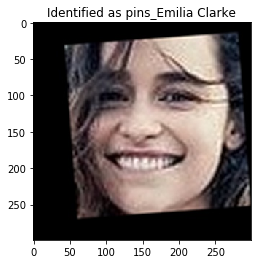

In [150]:
#had to do this because of did not save indices :(
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');